


# Craw em uma página da Web com Scrapy e Python 3



## Exemplo de criaçao básica de scraper<br>


Criando um scraper básico<br>

A raspagem é um processo de duas etapas:<br>

- Você sistematicamente encontra e baixa páginas da web.<br>
- Você pega essas páginas da web e extrai informações delas.<br><br>


Para este tutorial, vamos usar Python e Scrapy para construir nosso scraper.<br>




Scrapy, como a maioria dos pacotes Python, está no PyPI (também conhecido como pip). PyPI, o Python Package Index, é um repositório de propriedade da comunidade de todos os softwares Python publicados.<br>

Se você tem uma instalação do Python, você já tem o pip instalado em sua máquina, então você pode instalar o Scrapy com o seguinte comando:


**$ pip install scrapy** <br><br>

Crie um direito para trabalhar e acesse ele. <br>
Dentro do seu diretorio crie um arquivo chamado scraper.py<br>


In [11]:
### dentro do seu scraper.py adicione o codigo abaixo

#### name — apenas um nome para a spider.
#### start_urls — uma lista de URLs de onde você começa a rastrear. Começaremos com um URL.


import scrapy


class BrickSetSpider(scrapy.Spider):
    name = "brickset_spider"
    start_urls = ['http://brickset.com/sets/year-2016']
    
    def parse(self, response):
        SET_SELECTOR = '.set'
        PIECES_SELECTOR = './/dl[dt/text() = "Pieces"]/dd/a/text()'
        MINIFIGS_SELECTOR = './/dl[dt/text() = "Minifigs"]/dd[2]/a/text()'
        IMAGE_SELECTOR = 'img ::attr(src)'
        for brickset in response.css(SET_SELECTOR):
            NAME_SELECTOR = 'h1 ::text'
            yield {
                'name': brickset.css(NAME_SELECTOR).extract_first(),
                'pieces': brickset.xpath(PIECES_SELECTOR).extract_first(),
                'minifigs': brickset.xpath(MINIFIGS_SELECTOR).extract_first(),
                'image': brickset.css(IMAGE_SELECTOR).extract_first(),
            }

## Codigo explicado

- O scraper inicializou e carregou componentes e extensões adicionais necessários para lidar com a leitura de dados de URLs.
- Ele usou o URL que fornecemos na lista **start_urls** e pegou o HTML, assim como seu navegador da web faria.
- Ele passou esse HTML para o método **parse**
- o valor do **SET_SELECTOR** foi feito com base na análise do HTML, por tanto para definir o valor faça uma análise inicial do HTML. No caso acima a estrutura do HTML é


### Raspar esta página é um processo de duas etapas:

- Primeiro, pegue cada conjunto procurando as partes da página que contêm os dados que deseja.<br>
- Então, para cada conjunto, pegue os dados que quer dele, puxando os dados das tags HTML.<br>
- scrapy (lib do python) captura dados com base nos **seletores** que você fornece. 
    - Seletores são padrões que podemos usar para encontrar um ou mais elementos em uma página para que possamos trabalhar com os dados dentro do elemento. scrapy suporta seletores CSS ou seletores XPath.
- No tutorial serão usados seletores CSS por enquanto, pois CSS é a opção mais fácil e perfeita para encontrar todos os conjuntos na página. Se você observar o HTML da página, verá que cada conjunto é especificado com o conjunto de classes. Como estamos procurando uma classe, usaremos **.set** (linha 15) para o seletor de CSS. Tudo o que temos a fazer é passar esse **seletor** para o objeto de resposta ( linha 19)<br>
- Esse código (linha 15-20) pega todos os conjuntos na página e faz um loop sobre eles para extrair os dados.<br>
- Outra olhada na fonte da página que estamos analisando nos diz que o nome de cada conjunto é armazenado em uma tag **h1** para cada conjunto. Na linha 20 ajustamos o seletor para coletar o texto da tag h1
    - Anexamos  **::text** ao nosso seletor para o nome. Esse é um pseudo-seletor CSS que busca o texto dentro de uma tag em vez da própria tag.
    - Chamamos **extract_first()** no objeto retornado por brickset.css(NAME_SELECTOR), por exemplo, porque queremos apenas o primeiro elemento que corresponda ao seletor. Isso nos dá uma string, em vez de uma lista de elementos.





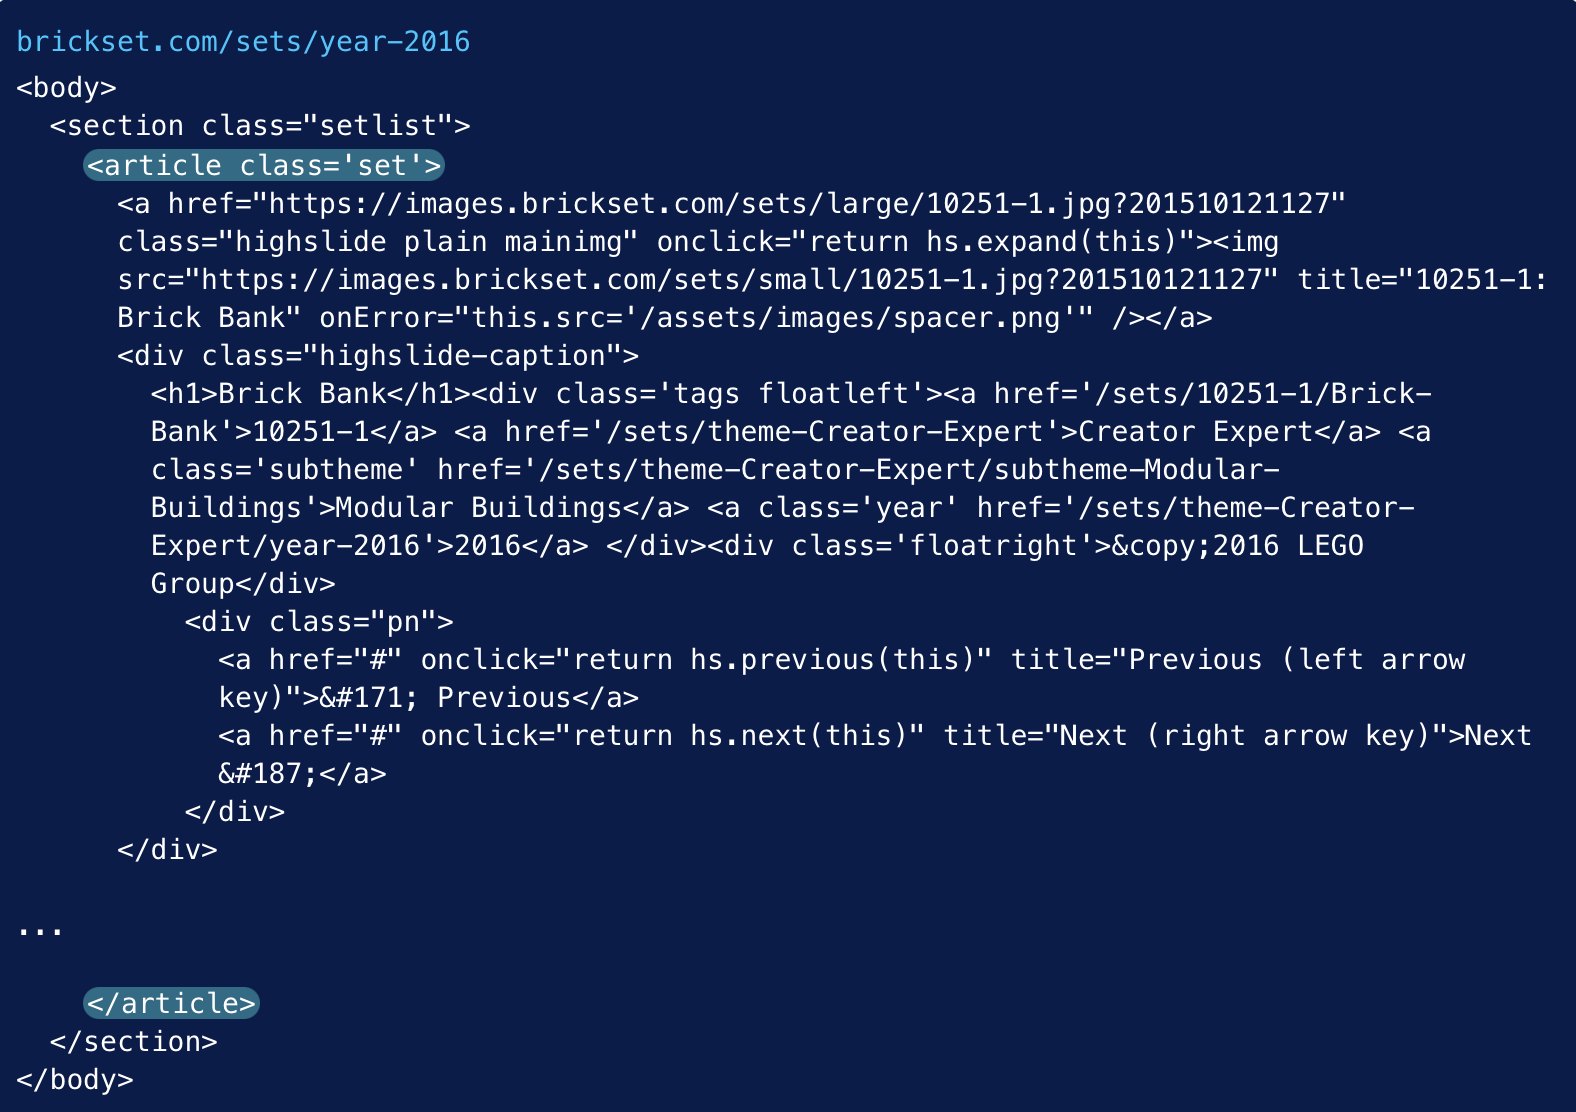



As etapas acima, dado o exemplo da biblioteca, podem ser associados a:<br>
   - "Ler o cada livro disponivel na bilioteca, de acordo com critério" - linha 12 <br>
   - "Baseado na regra definida identificar o livro" - método **parse** linha 15 - 18 <br>
   - "Armazenaor o livro" - linha 21-26 ( nesta etapa poderia ser salvo no banco de dados por exemplo), com palavara chave associada.
   
  Para testar seu código, via terminal execute o comando abaixo: <br>
  **$ scrapy runspider scraper.py**

***Utilize o modelo acima apenas como exemplo, em caso da URL estar indisponível.***

CSS Selector - Dicas https://saucelabs.com/resources/articles/selenium-tips-css-selectors <br>
SCRAPY https://scrapy.org <br>
REF https://www.digitalocean.com/community/tutorials/how-to-crawl-a-web-page-with-scrapy-and-python-3